Ans 1.a

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def grad_1(x):
  return 2*x+3           # gradient of first equation = 2*x +3

def grad_2(x):
  return 4*(x*x*x) - 6*x + 2       # gradient of second equation = 4*x*x*x - 6*x +2

def gradient_descent(gradient, init_, learn_rate, n_iter=50, tol= 1e-06):
  x= init_
  for _ in range(n_iter):
    delta= -learn_rate*gradient(x)
    if np.all(np.abs(delta) <= tol):
      break
    x+= delta
  return round(x*1000)/1000


x= gradient_descent(grad_1, 0, 0.1, 50, 1e-06)     # Function return the optimal value of x for which minima occurs
                                                   # No of iterations = 50 

print("Value of x at which occurs is ", x)
print("Value of function at minimua ", x*x + 3*x + 4)

x= gradient_descent(grad_2, 0, 0.05, 50, 1e-06)  # Return the value of x for minima of second equation

print("Value of x at which occurs is ", x)
print("Value of function at minimua ", ((x**4 - 3*x**2 + 2*x)))


Value of x at which occurs is  -1.5
Value of function at minimua  1.75
Value of x at which occurs is  -1.366
Value of function at minimua  -4.848076206064


Ans 1.b


In [55]:
import random
import numpy as np
import pandas as pd


#a is the slope for linear model
#b is the intercept for linear model
#X is our training data
#y is output



def mean_sqr_LR(X,y,a,b):         # mean square root as our cost function
  return 1/n * np.sum((y - a*X - b)**2)

def gradient_descent_LR(X, y, learn_rate,n_iter , tol=1e-06):
  a=0
  b=0
  n= len(X)

  for _ in range(n_iter):   # at most "n_iter"  number of iteration
    a_gradient = -2/n * np.sum(X * (y- a*X - b))
    b_gradient = -2/n * np.sum(y - a*X - b)  
    mse = mean_sqr_LR(X, y, a, b)
    if mse<= tol :
      break
    a+= learn_rate* a_gradient * (-1)
    b+= learn_rate* b_gradient * (-1)

  return round(a*1000)/1000 , round(b*1000)/1000

def pred(X, a, b):
  return a*X + b

Ans 1.c

0.295 2.023


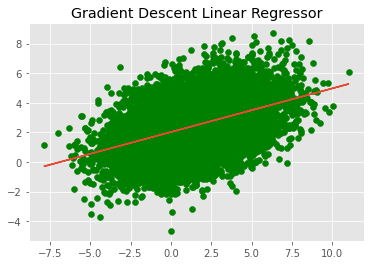

In [56]:
import random
import numpy as np
import pandas as pd
                                    # generating data
n= 10000       # number of samples
np.random.seed(0)                 
X =  2.5*np.random.randn(n) + 1.5
res =  1.5*np.random.randn(n)
y =   0.3*X + res + 2


a,b = gradient_descent_LR(X, y, 0.05, 10000)     #  learn rate= 0.05 and number of iterations= 10000

# visualing the output
plt.style.use('ggplot')   
plt.scatter(X, y, color="green")
plt.plot(X, pred(X, a, b))
plt.title("Gradient Descent Linear Regressor")
print(a, b)

The value of a and b after performing linear regression on the given data are 0.304 and 1.978 respectively

Ans 1.d

In [57]:
# In mini batch only take a subset of dataset and calculate the gradient using them and update our v

def mean_sqr_LR(X,y,a,b):
  return 1/n * np.sum((y - a*X - b)**2)

def iterate_minibatches(X, y, batch_size, shuffle=  False):   #Function for the required subset
  assert X.shape[0] == y.shape[0]
  if shuffle:
    index =  np.arange(X.shape[0])
    np.random.shuffle(index)
  for start_index in range(0, X.shape[0], batch_size):
    end_index = min(start_index + batch_size, X.shape[0])
    if shuffle:
      excerpt = index[start_index: end_index]
    else:
      excerpt = slice(start_index, end_index)
    
    yield X[excerpt], y[excerpt]

def calculate_gradient(X, y, a, b): #  To calulate the gradient of given dataset
  n= len(X)
  da = -2/n *np.sum(X * (y- a*X -b))
  db = -2/n *np.sum(y - a*X -b)
  return (da,db)

# compute mini batch gradient decent
def mini_sgd(X,y , batchsize,learn_rate= 0.05 , tol=1e-06 ):
  a = 0
  b = 0
  for _ in range(int(1000)):
    for batch in iterate_minibatches(X, y, batchsize , shuffle=True):
      x_batch, y_batch = batch
      a_gradient ,b_gradient = calculate_gradient(x_batch ,y_batch , a , b )
      mse = mean_sqr_LR(X,y,a,b)
      if (mse <= tol):
        break
      a += -learn_rate*a_gradient
      b += -learn_rate*b_gradient
  return (a, b)

a, b = mini_sgd(X,y, 100 )

print(round(a,4), round(b,4) )

0.2685 2.0327


Ans 1.e

In [60]:
import time

def solve(X,y,a,b):
    return 1/n * np.sum((y - a*X - b)**2)

batch_sizes_op = [ 25, 50, 100 , 200 , 500, 1000, 2000, 5000, 10000]

start = time.time()
a,b = gradient_descent_LR(X, y, 0.05, 1000)   # updating a and b 10000 times
end = time.time()
print((end-start))

start = time.time()
a, b = mini_sgd(X, y, 100, 0.05, 1000)
end = time.time()
print(end-start)
print("\n")




error_min = float('inf')
errors = []
time_min = float('inf')
times = []
a_best, b_best = 0,0
best_batch_size_t = -1

for tt in batch_sizes_op:
    _a =0
    _b =0
    start = time.time()
    _a, _b = mini_sgd(X, y, tt)
    end = time.time()
    t = end-start
    times.append(t)
    e = solve(X,y,_a,_b)
    errors.append(e)
    if e < error_min and t < time_min :
        best_batch_size_t = tt
        time_min = t
        error_min = e
        a_best, b_best = _a, _b


for i in range(len(batch_sizes_op)):
    print("Batch size = ", batch_sizes_op[i], "     time taken =", "{:.3f}".format(times[i]))  
for i in range(len(batch_sizes_op)):
    print("Batch size = ", batch_sizes_op[i], "     error error =", "{:.6f}".format(errors[i]))

print("Batch size for which error is least= " + str(best_batch_size_t))



0.1417701244354248
0.29595041275024414


Batch size =  25      time taken = 31.538
Batch size =  50      time taken = 15.678
Batch size =  100      time taken = 7.975
Batch size =  200      time taken = 4.323
Batch size =  500      time taken = 1.888
Batch size =  1000      time taken = 1.146
Batch size =  2000      time taken = 0.730
Batch size =  5000      time taken = 0.498
Batch size =  10000      time taken = 0.397
Batch size =  25      error error = 2.635220
Batch size =  50      error error = 2.220885
Batch size =  100      error error = 2.220988
Batch size =  200      error error = 2.219204
Batch size =  500      error error = 2.218906
Batch size =  1000      error error = 2.218992
Batch size =  2000      error error = 2.220121
Batch size =  5000      error error = 2.218735
Batch size =  10000      error error = 2.218721
Batch size for which error is least= 10000


Ans 2


(i) Probability of having cold and fever  = P(cold) x P(fever)= 0.02* 0.307 

(ii) Probability that someone who has a cough has a cold =

E1 =  have cough
E2 =  have cold
L  =  have lung disease
S  =  someone smokes


P(L) = P(S)P(L|S) + P(!S)P(L|!S)
      = 0.2 x 0.1009 + 0.8 x 0.001 = 0.02098

P(!L) = 1 - 0.02098 = 0.97902

P(E1|E2)= P(L)P(E1|L,E2) + P(!L)P(C1|!L, E2)
        = 0.02098 x 0.7525 + 0.97902 x 0.505 = 0.5101

P(E1|!E2) = P(L)P(E1|L,!E2) + P(!L)P(E1|!L,!E2)
          = 0.02098 x 0.505 + 0.97902 x 0.01
          = 0.0203851

P(E2|E1) = P(E2)P(E1|E2) / ( P(E2)P(E1|E2) + P(!E2)P(E1|!E2) ) 
        = 0.02 x 0.5101 / ( 0.02 x 0.5101 + 0.98 x 0.0203851 )
         = 0.338


        Answer = 0.338

Ans 3




For k sided multinomial distribution, the probability is  \\

P(x $\mid \theta$) =  n! $\prod_{i=1}^{k}$ $\theta_i^x_i$ / $x_i$ ! \\


where \\
 $\sum_{i=1}^{k}$  $x_i$ = n \\
 
  $\sum_{i=1}^{k}$  $\theta_i$ = 1  \\
  
  $\theta_i$ $\geq$ 0  and  $x_i$ $\geq 0, \forall  i  \in [ k]$   \
  



Log likelihood for this..... \\

LL($\theta$)  = log(n!) + $\sum_{i=1}^{k}$  $x_i$ log($\theta_i$) -  $\sum_{i=1}^{k} $ log($x_i !$) \\

= g($\theta$) =  $\sum_{i=1}^{k}$ $\theta_i$  -1 = 0 \\


Our problem becomes ..... \\

L($\theta$, $\lambda$) = LL($\theta$) - $\lambda$ g($\theta$) \\ 

L($\theta$, $\lambda$)  = log(n!) + $\sum_{i=1}^{k}$  $x_i$ log($\theta_i$) - $\sum_{i=1}^{k} $ log($x_i !$)   - $\lambda$ $\sum_{i=1}^{k}$ $\theta_i$ + $\lambda$ \\

$\frac{\partial L}{\partial \theta_i}$ =  $\frac{x_i}{\theta_i}$ -$\lambda$ =0 \\

$\Rightarrow$ $\theta_i$ =  $\frac{x_i}{\lambda}$ \\

 $\Rightarrow$ $\sum_{i=1}^{k}$ $\theta_i$  - 1 = 0 \\

 $\Rightarrow$ $\sum_{i=1}^{k}$  $\frac{x_i}{\lambda}$ =1  \\

 $\Rightarrow$  $\lambda$ = $\sum_{i=1}^{k}$  $x_i$ \\

 $\Rightarrow$  $\theta_i$ =  $\frac{x_i}{\sum_{i=1}^{k} x_i}$ 

 
